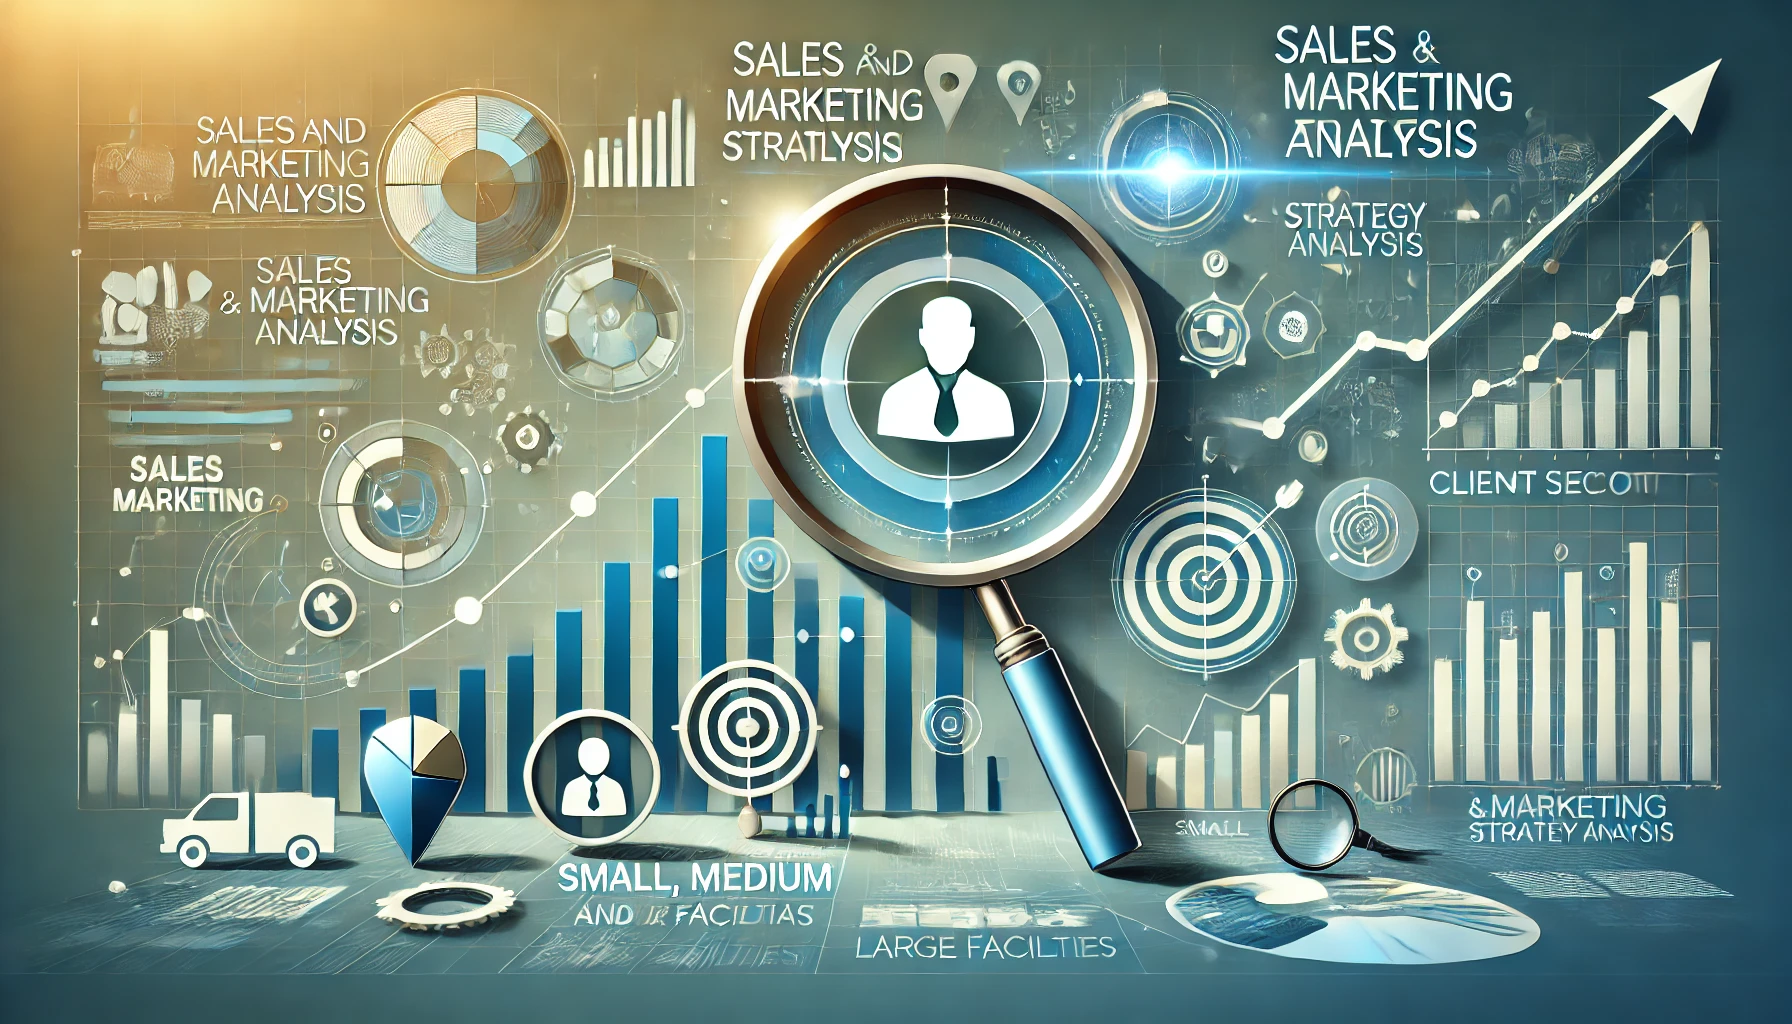

# Problem Statement

The company is running multiple sales and marketing campaigns targeting different client segments, including Small, Medium, and Large Facilities. However, there is a lack of clarity on which sales contacts and marketing strategies yield the best Return on Investment (ROI) for these client types. The current approach does not effectively identify the most profitable methods or optimize the allocation of marketing resources. This creates inefficiencies in spending, particularly with certain campaigns underperforming in smaller segments.

# Business Objectives

1. **Evaluate Campaign Effectiveness**: Assess the effectiveness of various sales contacts (e.g., phone, flyers, direct sales) and marketing campaigns (email, flyers, phone) based on ROI across different client types (Small, Medium, Large Facilities).
2. **Optimize Resource Allocation**: Identify high-performing sales contacts and campaigns to ensure that resources (time, budget, and manpower) are allocated to the most profitable client segments.
3. **Segmented Strategy Development**: Develop differentiated strategies for each client segment based on their unique needs and ROI patterns to maximize returns.
4. **Improve Decision-Making**: Provide actionable insights into which sales and marketing approaches work best for each client type, helping decision-makers optimize future strategies.

# Business Impacts

1. **Increased Profitability**: By reallocating resources to the most profitable campaigns and reducing investment in underperforming areas, the company can significantly improve its overall ROI.
2. **Better Client Targeting**: Insights gained from the analysis will allow the company to tailor its marketing strategies according to the needs of different client segments, improving the relevance and success of outreach efforts.
3. **Cost Savings**: The project will help identify campaigns that are not yielding sufficient returns, allowing the company to reduce or eliminate low-impact spending, which will ultimately lower operational costs.
4. **Improved Efficiency**: Sales teams will focus on more effective sales contacts, reducing the time and effort spent on strategies that do not generate high returns, leading to improved efficiency and better use of manpower.
5. **Data-Driven Decisions**: The analysis will drive data-backed decisions for future marketing and sales efforts, reducing reliance on guesswork and improving the likelihood of success in campaigns.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
!git clone https://github.com/sdey270796/Sales-Marketing-Strategy.git

Cloning into 'Sales-Marketing-Strategy'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 31.20 KiB | 968.00 KiB/s, done.


In [3]:
file_path = "/content/Sales-Marketing-Strategy/Campaign-Data.csv"

df = pd.read_csv(file_path)

df.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


## Defininng the Features

The dataset contains various features related to sales and marketing campaigns for different clients.

1. **Client ID**: A unique identifier for each client, which can be used to track sales and campaign activities.

2. **Client Type**: Describes the type of client (e.g., "Medium Facility"). This categorization helps in analyzing the effectiveness of campaigns based on the size of the facility.

3. **Number of Customers**: The number of customers associated with each client. This is a key demographic feature that may influence the success of campaigns.

4. **Monthly Target**: The sales target set for the client per month.

5. **Zip Code**: The geographical location of the client, which can help analyze how location impacts campaign success.

6. **Calendardate**: The date on which the data was recorded or the sales occurred, useful for time-based trend analysis.

7. **Amount Collected**: The total revenue collected from the client during a specific period.

8. **Unit Sold**: The number of units sold to the client, which indicates the volume of sales activity.

9. **Campaign (Email)**: Indicates the extent to which email campaigns were used (measured in some numeric form, such as frequency or budget).

10. **Campaign (Flyer)**: Represents the extent to which flyer campaigns were used.

11. **Campaign (Phone)**: Represents the extent of phone-based campaigns used.

12. **Sales Contact 1 to Sales Contact 5**: These represent various types of sales contacts (e.g., direct sales, meetings, etc.) made with the client. Different sales contact methods may perform differently depending on the client type.

13. **Number of Competition**: Describes the level of competition in the market (e.g., "Low"). This can be used to understand how competition affects sales performance.

This dataset provides a comprehensive view of marketing efforts across different client segments, allowing for analysis of which strategies and sales contacts generate the best returns.

## Basic Checks

In [4]:
df.shape

(2976, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              2976 non-null   object 
 1   Client Type            2976 non-null   object 
 2   Number of Customers    2976 non-null   int64  
 3   Montly Target          2976 non-null   int64  
 4   Zip Code               2976 non-null   int64  
 5   Calendardate           2976 non-null   object 
 6   Amount Collected       2976 non-null   int64  
 7   Unit Sold              2976 non-null   int64  
 8   Campaign (Email)       2976 non-null   float64
 9   Campaign (Flyer)       2976 non-null   float64
 10  Campaign (Phone)       2976 non-null   float64
 11  Sales Contact 1        2976 non-null   float64
 12  Sales Contact 2        2976 non-null   float64
 13  Sales Contact 3        2976 non-null   float64
 14  Sales Contact 4        2976 non-null   float64
 15  Sale

In [6]:
df.isnull().sum()

,0
Client ID,0
Client Type,0
Number of Customers,0
Montly Target,0
Zip Code,0
Calendardate,0
Amount Collected,0
Unit Sold,0
Campaign (Email),0
Campaign (Flyer),0


In [7]:
df.describe()

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5
count,2976.000000,2976.000000,2976.0,2.976000e+03,2976.000000,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03
mean,1456.935484,75.080645,1003.0,1.700440e+07,121.464718,1.432850e+05,6.854186e+05,2.977743e+04,1.313407e+05,2.023319e+06,1.867487e+06,7.076361e+04,1.462954e+04
std,1669.848734,87.042114,0.0,3.025803e+07,216.413984,7.230452e+05,1.727587e+06,3.832134e+05,1.034882e+06,3.396991e+06,3.271349e+06,3.869872e+05,8.905955e+04
min,0.000000,5.000000,1003.0,-2.216150e+07,-63.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,240.000000,10.000000,1003.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,960.000000,47.500000,1003.0,3.409460e+06,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.450000e+05,3.225000e+05,0.000000e+00,0.000000e+00
75%,2090.000000,101.250000,1003.0,2.045676e+07,147.000000,0.000000e+00,8.148285e+04,0.000000e+00,0.000000e+00,2.580000e+06,2.580000e+06,0.000000e+00,0.000000e+00
max,9840.000000,510.000000,1003.0,2.079771e+08,1500.000000,1.144673e+07,1.359395e+07,9.617380e+06,2.902500e+07,3.063750e+07,2.612250e+07,4.837500e+06,1.612500e+06


In [8]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['Number of Customers', 'Montly Target', 'Zip Code', 'Amount Collected',
       'Unit Sold', 'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5'],
      dtype='object')

In [9]:
cat_cols = df.select_dtypes(exclude='number').columns
cat_cols

Index(['Client ID', 'Client Type', 'Calendardate', 'Number of Competition'], dtype='object')

In [10]:
df.nunique()

,0
Client ID,124
Client Type,4
Number of Customers,71
Montly Target,39
Zip Code,1
Calendardate,24
Amount Collected,160
Unit Sold,133
Campaign (Email),219
Campaign (Flyer),754


# Feature Engineering and Selection

In [11]:
print("\nUnique Values in Categorical Columns:")
for column in ['Client Type', 'Number of Competition']:
    print(f"{column}: {df[column].unique()}")


Unique Values in Categorical Columns:
Client Type: ['Medium Facility' 'Large Facility ' 'Small Facility ' 'Private Facility']
Number of Competition: ['Low' 'High']


## Dropping `Client ID` and `ZIP Code` Columns

In [12]:
data = df.drop(columns=['Client ID', 'Zip Code'], axis=1)
data.head()

,Client Type,Number of Customers,Montly Target,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,Medium Facility,2800,125,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,Medium Facility,2800,125,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,Medium Facility,2800,125,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,Medium Facility,2800,125,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,Medium Facility,2800,125,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


## Adding `Month` Column

In [13]:
data['Month'] = pd.to_datetime(data['Calendardate'], format='%d-%m-%Y').dt.month
data.head()

,Client Type,Number of Customers,Montly Target,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Month
0,Medium Facility,2800,125,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1
1,Medium Facility,2800,125,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2
2,Medium Facility,2800,125,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3
3,Medium Facility,2800,125,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,4
4,Medium Facility,2800,125,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,5


In [14]:
data['Month'].value_counts()

,count
Month,
1,248
2,248
3,248
4,248
5,248
6,248
7,248
8,248
9,248


In [15]:
data.drop('Calendardate', axis=1, inplace=True)
data.head()

,Client Type,Number of Customers,Montly Target,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Month
0,Medium Facility,2800,125,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1
1,Medium Facility,2800,125,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2
2,Medium Facility,2800,125,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3
3,Medium Facility,2800,125,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,4
4,Medium Facility,2800,125,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,5


### Mapping the Months

In [16]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

data['Month'] = data['Month'].map(month_map)
data.head()

,Client Type,Number of Customers,Montly Target,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Month
0,Medium Facility,2800,125,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Jan
1,Medium Facility,2800,125,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,Feb
2,Medium Facility,2800,125,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mar
3,Medium Facility,2800,125,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,Apr
4,Medium Facility,2800,125,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,May


In [17]:
data.columns

Index(['Client Type', 'Number of Customers', 'Montly Target',
       'Amount Collected', 'Unit Sold', 'Campaign (Email)', 'Campaign (Flyer)',
       'Campaign (Phone)', 'Sales Contact 1', 'Sales Contact 2',
       'Sales Contact 3', 'Sales Contact 4', 'Sales Contact 5',
       'Number of Competition', 'Month'],
      dtype='object')

In [18]:
numeric_cols = data.select_dtypes(include='number').columns
cat_cols = data.select_dtypes(exclude='number').columns

In [19]:
numeric_cols, cat_cols

(Index(['Number of Customers', 'Montly Target', 'Amount Collected', 'Unit Sold',
        'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
        'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
        'Sales Contact 4', 'Sales Contact 5'],
       dtype='object'),
 Index(['Client Type', 'Number of Competition', 'Month'], dtype='object'))

In [20]:
data.nunique()

,0
Client Type,4
Number of Customers,71
Montly Target,39
Amount Collected,160
Unit Sold,133
Campaign (Email),219
Campaign (Flyer),754
Campaign (Phone),29
Sales Contact 1,27
Sales Contact 2,67


# Basic EDAs

## Percentage distribution of `Client Type`

In [21]:
percentage_distribution = data['Client Type'].value_counts(normalize=True) * 100
percentage_distribution = percentage_distribution.round(0).astype(int)
print("Percentage Distribution of Client Type:")
print(percentage_distribution)

Percentage Distribution of Client Type:
Client Type
Large Facility      46
Small Facility      28
Medium Facility     17
Private Facility     9
Name: proportion, dtype: int64


The result indicates that among the various client types, 46% are classified as Large Facility, 28% as Small Facility, 17% as Medium Facility, and 9% as Private Facility.

## Display the count of each category in `Client Type` as whole numbers

In [22]:
whole_numbers_counts = (percentage_distribution * len(data)).round().astype(int)
print("Counts of each category in 'Client Type' as whole numbers:")
print(whole_numbers_counts)

Counts of each category in 'Client Type' as whole numbers:
Client Type
Large Facility      136896
Small Facility       83328
Medium Facility      50592
Private Facility     26784
Name: proportion, dtype: int64


The counts of each category in the 'Client Type' variable are as follows: 136,896 instances of Large Facility, 83,328 instances of Small Facility, 50,592 instances of Medium Facility, and 26,784 instances of Private Facility.

## Crosstabulation of 'Number of Competition' and 'Client Type' with column percentages and totals

In [23]:
cross_table = pd.crosstab(data['Number of Competition'], data['Client Type'], margins=True, normalize='columns')
print("Cross-Tabulation of 'Number of Competition' and 'Client Type':")
cross_table

Cross-Tabulation of 'Number of Competition' and 'Client Type':


Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


The cross-tabulation table displays the distribution of 'Client Type' categories across different levels of 'Number of Competition.' The values represent the proportions of each 'Client Type' within the specified 'Number of Competition' levels. For instance, in the 'High' competition category, each 'Client Type'—Large Facility, Medium Facility, Private Facility, and Small Facility—constitutes 16.67% of the total instances within that competition level. In contrast, in the 'Low' competition category, each 'Client Type' represents 83.33% of the total instances within that competition level.

## Distribution of All Numeric Columns

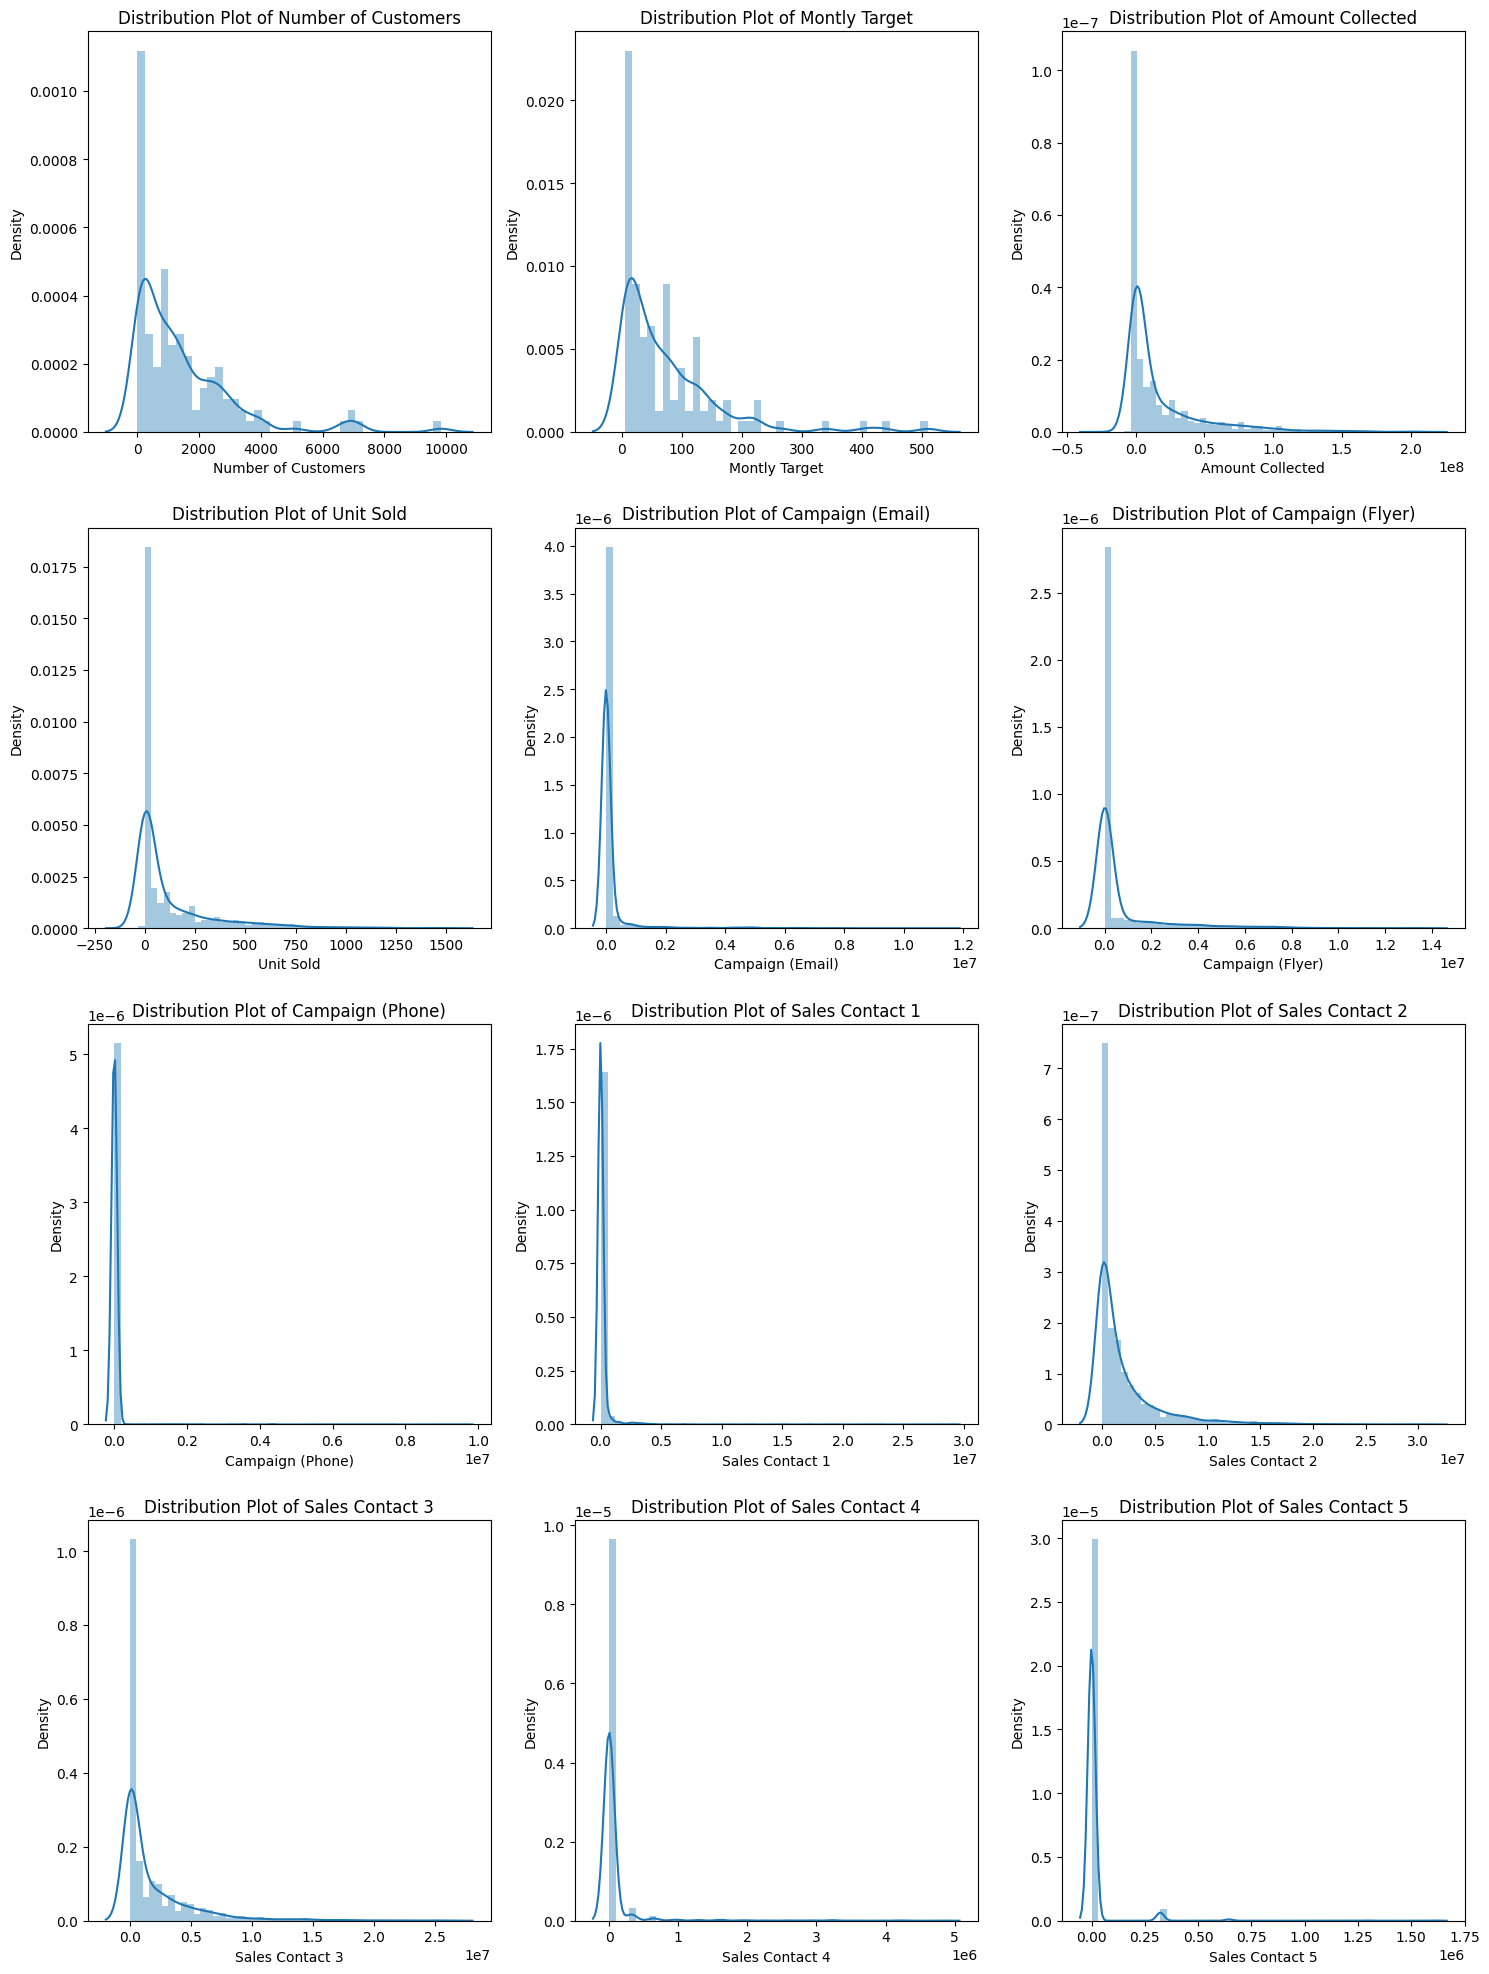

In [23]:
n_cols = len(numeric_cols)
n_rows = int(np.ceil(n_cols / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))

for i, col in enumerate(numeric_cols):
    row_idx = i // 3
    col_idx = i % 3
    sns.distplot(data[col], ax=axes[row_idx, col_idx], kde=True)

    axes[row_idx, col_idx].set_title(f"Distribution Plot of {col}")
    axes[row_idx, col_idx].set_xlabel(col)

for i in range(n_cols, n_rows*3):
    fig.delaxes(axes.flatten()[i])

fig.tight_layout()
plt.show()

In the context of your project on "Sales-Marketing Strategy Making," these distribution plots can offer several key insights into the current sales and marketing performance metrics. Let’s break down what these plots might mean from a strategic standpoint:

1. **Number of Customers**: The plot shows that most customers are in the lower range (between 0 and 1000), with very few larger accounts. This suggests that your business might have a large number of smaller clients, potentially indicating a need to either focus on scaling up existing accounts or targeting higher-value customers.

2. **Monthly Target**: The right-skewed distribution here shows that most of your monthly targets are low, with some outliers having very high targets. This could mean that your sales targets are not evenly distributed across the team or product lines. A more balanced target distribution may need to be strategized to ensure that higher targets are achievable across the board.

3. **Amount Collected**: The fact that most amounts collected are clustered at the lower end with a few higher outliers indicates that revenue generation is concentrated among a few high-performing campaigns or customers. This implies a need to develop strategies that can elevate lower-revenue streams to make revenue more evenly distributed and less dependent on a few outliers.

4. **Units Sold**: The pattern suggests that most products or services sold are in smaller quantities. For your strategy, this could mean exploring upselling or cross-selling opportunities to increase the number of units sold per customer or deal.

5. **Campaign (Email, Flyer, Phone)**: The campaign-related plots show that the majority of campaigns, especially in terms of emails and phone contacts, are on a smaller scale, with very few larger campaigns. This might point to the need for scaling up your marketing campaigns (such as increasing email reach or phone campaigns) to achieve broader customer engagement and improved conversion rates.

6. **Sales Contacts (1 to 5)**: The distribution for the sales contacts indicates that most customer interactions happen at lower levels (closer to 0), with very few high-contact interactions. This suggests that your sales team may not be engaging enough with customers beyond initial contact, which could be critical in driving conversions. You might want to focus on increasing customer engagement through consistent follow-ups or implementing more robust customer relationship management (CRM) strategies.

***Strategic Implications for Sales and Marketing***
- **Funnel Optimization**: Since most metrics like number of customers, unit sold, and campaign size are skewed toward smaller values, it indicates that the sales funnel might not be fully optimized. You may need to look into bottlenecks preventing more significant conversions.
  
- **Customer Segmentation**: The plots show a small portion of high-value customers, campaigns, or sales interactions. Strategically, it might be valuable to segment customers by value and focus marketing efforts on expanding high-value customer bases.

- **Campaign Expansion**: Given the data's concentration in lower-value campaigns, you could explore opportunities to increase the scale and effectiveness of marketing outreach efforts. A shift toward more comprehensive, personalized campaigns or multichannel approaches could help you increase conversions and customer engagement.

- **Data-Driven Strategy**: These plots suggest a high reliance on smaller transactions and interactions. You might want to use predictive models to identify high-potential leads, prioritize them in your sales process, and allocate more resources to accounts or campaigns that show signs of larger future returns.

Overall, these distributions highlight areas where your strategy might benefit from increased engagement efforts, targeting higher-value customers, and optimizing the sales funnel for improved efficiency and conversions.

## Distributions of All Categorical Columns

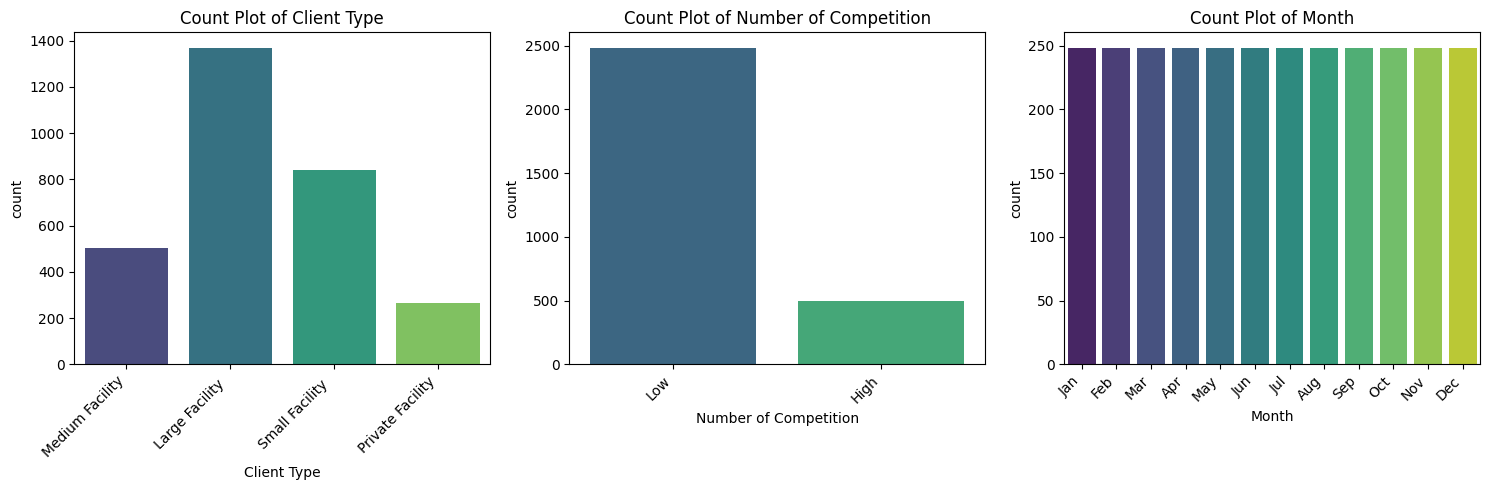

In [24]:
n_cols = len(cat_cols)

fig, axes = plt.subplots(1, n_cols, figsize=(15, 5))

for i, col in enumerate(cat_cols):
  col_idx = i
  sns.countplot(x=data[col], ax=axes[col_idx], palette='viridis')
  axes[col_idx].set_title(f"Count Plot of {col}")
  axes[col_idx].set_xlabel(col)
  axes[col_idx].set_xticklabels(axes[col_idx].get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()
plt.show()

1. ***Client Type (Left Plot)***:
   - **Large Facility** has the highest count, followed by **Small Facility**, **Medium Facility**, and **Private Facility**.
   - **Strategic Implication**: This indicates that large facilities dominate your customer base, which may be due to more focused marketing or more appealing offerings for large-scale clients. You may want to evaluate whether your products/services are particularly suited for large facilities and if this is an intentional focus or a natural market tendency.
   - There’s an opportunity to either:
     - Double down on marketing to large and small facilities if they are more profitable.
     - Increase efforts towards medium and private facilities to diversify and balance your client base.

2. ***Number of Competition (Middle Plot)***:
   - The majority of cases fall under **Low Competition**, with relatively fewer instances of **High Competition**.
   - **Strategic Implication**: This suggests that most of your sales efforts are in markets where competition is low, possibly allowing more pricing power and easier market penetration.
   - You might consider:
     - Maximizing your presence in low-competition markets by strengthening relationships, upselling, or cross-selling.
     - Examining the high-competition segments to see whether any specific strategies (differentiation, better value propositions, etc.) could help improve your standing there.

3. ***Month (Right Plot)***:
   - The count plot of months shows a near-equal distribution across all months of the year.
   - **Strategic Implication**: This implies that your sales are fairly consistent throughout the year, with no particular month standing out as having a significantly higher or lower sales count.
   - You might want to:
     - Investigate whether certain products, services, or campaigns perform better in specific months, as this count plot shows equal numbers but doesn’t reveal performance nuances.
     - Consider seasonality and whether promotional pushes during certain months could yield above-average results or capitalize on any seasonal market trends.

***Overall Strategic Takeaways***
- **Client Segmentation**: With large facilities being a dominant client type, there’s an opportunity to tailor your sales strategies (perhaps with customized packages or services) to them. Conversely, medium and private facilities may require more attention or new marketing tactics to grow those segments.
  
- **Market Focus**: The low-competition environment is your sweet spot, where you should continue to innovate and maintain market leadership. However, entering high-competition spaces could require a more aggressive or differentiated approach, such as better pricing, superior service, or exclusive offerings.

- **Balanced Sales Cycles**: With sales activity being even throughout the year, your marketing strategy might not need heavy shifts based on seasonality, though exploring monthly trends more deeply could reveal smaller patterns worth capitalizing on.

This breakdown can help guide your strategy to optimize client targeting, competitive positioning, and sales performance across different time periods.

## Boxplot of All Numeric Columns

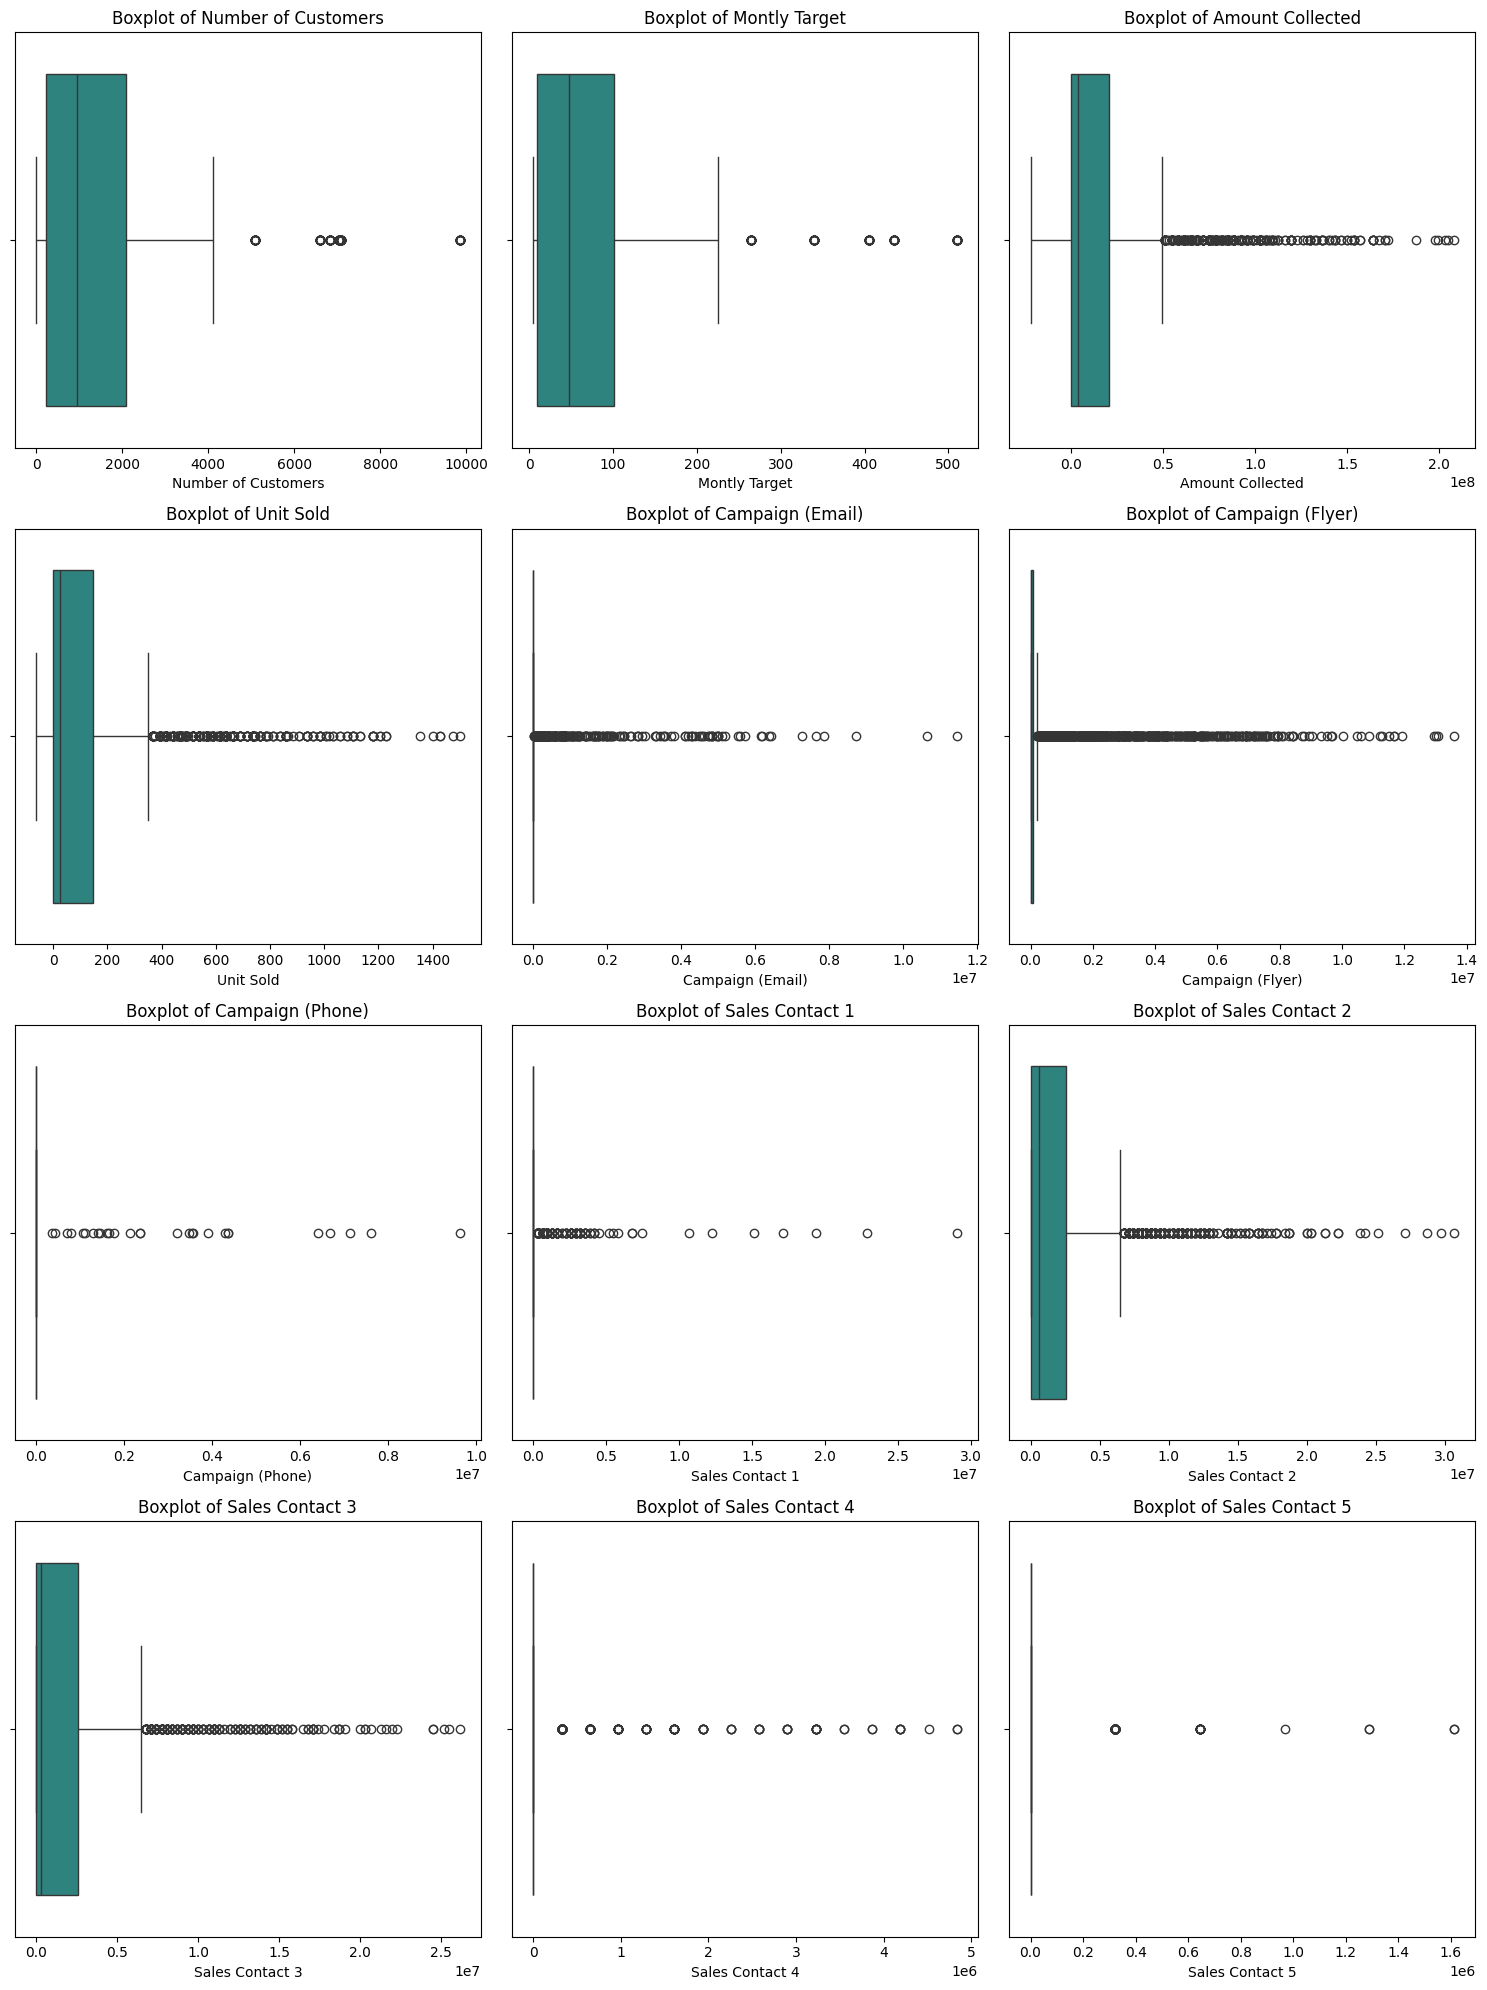

In [26]:
plt.figure(figsize=(15, 5 * n_rows))

for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[feature], palette='viridis')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

This image presents multiple **boxplots**, which provide a summary of the distribution of a dataset by showing the data's quartiles and outliers.

1. ***Number of Customers***
   - The boxplot shows that most customer numbers are concentrated within the interquartile range (IQR), but there are a few outliers in the higher range (above 6000).
   - **Strategic Insight**: A large concentration of customers is around a specific range, but the few outliers suggest that some campaigns or strategies might attract a significantly larger customer base. These outliers could indicate high-potential market segments worth further exploration.

2. ***Monthly Target***
   - The majority of monthly targets are clustered at lower values (between 0 and 100), with some outliers extending as high as 500.
   - **Strategic Insight**: Most sales targets are relatively modest, but the presence of higher targets suggests that some sales teams or campaigns are aiming for more ambitious goals. It might be beneficial to assess what strategies or conditions are allowing certain teams to aim for higher targets and how those can be replicated.

3. ***Amount Collected***
   - This boxplot shows most amounts collected within a low range, but with significant outliers reaching as high as 200 million.
   - **Strategic Insight**: A few campaigns or efforts are generating extremely high revenue compared to the majority. These outliers could provide valuable insights into what types of customers or campaigns are particularly lucrative and could inform strategies to replicate these successes.

4. ***Units Sold***
   - Most units sold fall within the lower range (around 0 to 200 units), with some extreme outliers reaching beyond 1000 units.
   - **Strategic Insight**: There may be an opportunity to increase the number of units sold through upselling, cross-selling, or targeting similar customers as those represented by the outliers. Investigating the characteristics of campaigns that resulted in higher unit sales could help boost overall sales.

5. ***Campaign (Email, Flyer, Phone)***
   - The boxplots for email, flyer, and phone campaigns show that most values are tightly concentrated near zero, with a few very large outliers extending into the millions.
   - **Strategic Insight**: The majority of marketing campaigns are small in scale, but the presence of very large outliers indicates the potential for highly successful campaigns. These outliers may represent effective marketing efforts that reached a wide audience, and they could provide useful case studies for scaling future campaigns.

6. ***Sales Contact 1 - Sales Contact 5***
   - These boxplots also show that most values are small, with the majority of sales contacts being low in frequency, but with a few larger outliers.
   - **Strategic Insight**: Most sales contacts are likely limited in their reach, but the outliers suggest that there are instances where more extensive contact efforts lead to greater success. This could indicate the need for a more sustained or frequent engagement with customers, as those who receive more sales contacts might be more likely to convert or bring in higher sales volumes.

***General Observations***
- **Outliers**: Each boxplot has several outliers, suggesting that in almost every category, there are a few high-performing campaigns, customers, or sales contacts that stand out. These high-performing cases can be valuable sources of insight for improving overall performance.
- **Skewed Distribution**: Most of the variables are skewed toward lower values, which means the majority of your campaigns, sales, and customer engagements are modest. This may indicate an opportunity to scale efforts for higher returns.
  
***Strategic Takeaways***
- **Target Outliers**: The outliers in each plot highlight areas where certain campaigns or customers are significantly outperforming the norm. Identifying what sets these cases apart could help you refine your strategies for greater efficiency and success.
- **Upscale Campaigns**: Most campaigns, especially in terms of email, flyer, and phone outreach, are low-volume. However, the presence of a few large campaigns suggests there may be opportunities to increase the scope of outreach and drive more conversions or revenue.
- **Increase Customer Engagement**: The low median number of sales contacts suggests that most customers aren’t being contacted frequently. A strategy that includes more touchpoints with customers, especially those identified as high-potential, could lead to better results.

By focusing on the high-performing outliers and understanding what drives their success, you can fine-tune your sales and marketing strategies to enhance overall outcomes.

## Boxplot of `Amount Collected` against the Categrical Columns

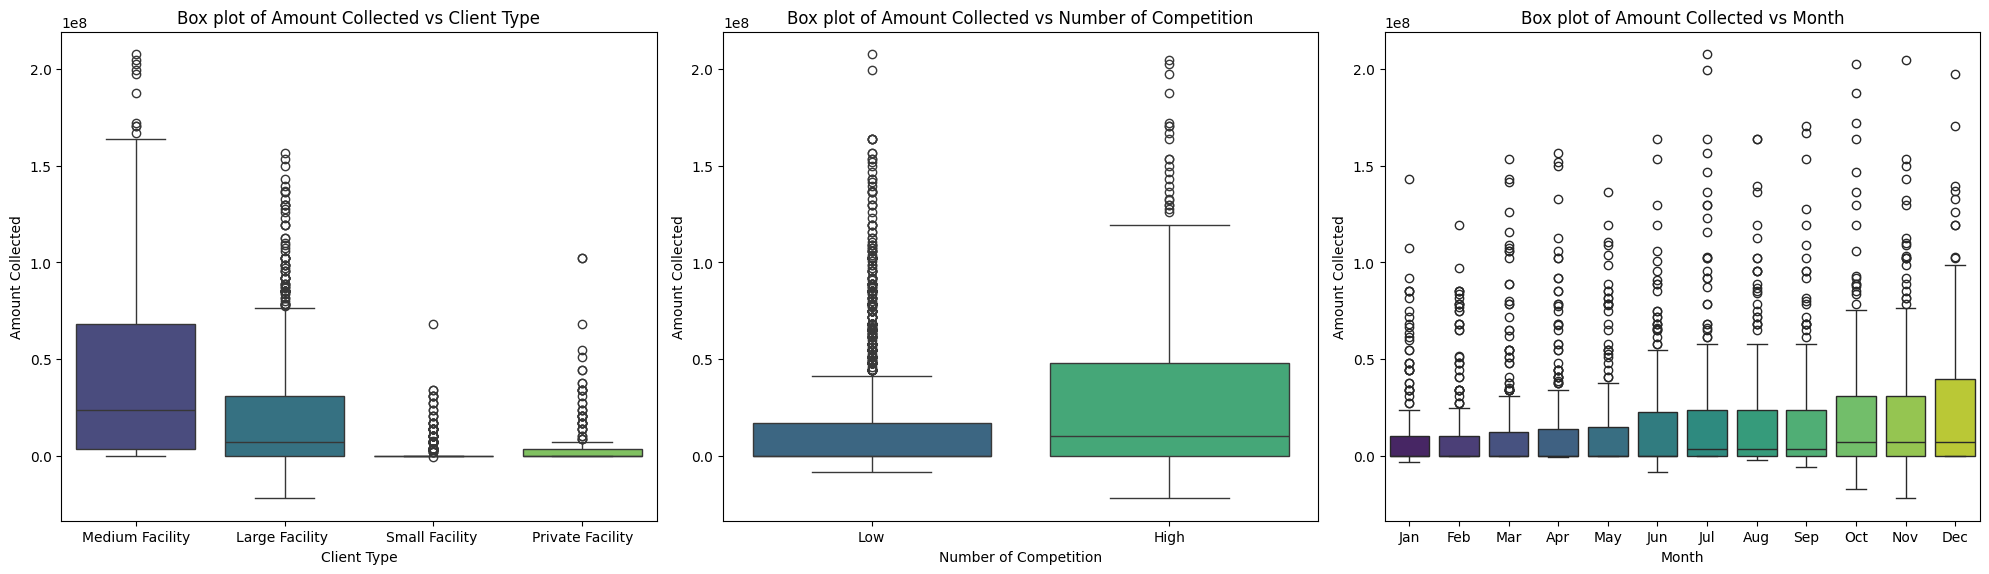

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(['Client Type', 'Number of Competition', 'Month']):
    sns.boxplot(x=col, y='Amount Collected', data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Box plot of Amount Collected vs {col}')

plt.tight_layout()
plt.show()

This image shows three **boxplots** that examine the distribution of the "Amount Collected" across different variables: **Client Type**, **Number of Competition**, and **Month**. These boxplots provide insights into how the amount of money collected varies across these factors.

1. ***Amount Collected vs Client Type (Left Plot)***
   - **Medium Facility**: This client type shows a wider range of amounts collected, with a median higher than other categories. There are several significant outliers, indicating that some medium facilities are responsible for very high collections (even exceeding 200 million).
   - **Large Facility**: The range here is more compressed compared to medium facilities, with the median slightly lower, though many outliers suggest that some large facilities also bring in significant amounts of revenue.
   - **Small Facility** and **Private Facility**: Both show very small median amounts collected, with fewer outliers and lower amounts overall compared to medium and large facilities.
   - **Strategic Insight**: Medium facilities seem to be high performers in terms of revenue collection, followed by large facilities. Small and private facilities contribute less revenue on average, which may indicate a potential focus area for upselling or providing more targeted services to increase revenue.

2. ***Amount Collected vs Number of Competition (Middle Plot)***
   - **Low Competition**: The range of amounts collected is fairly broad, with many high-value outliers. The median amount is on the lower side, indicating that while some low-competition environments can bring in large amounts of revenue, most are generating moderate returns.
   - **High Competition**: In high-competition environments, the median amount collected is higher, and the overall range of collected amounts is more compressed compared to low competition. Fewer outliers are visible, though the total range still extends to significant amounts.
   - **Strategic Insight**: It appears that environments with high competition generate more consistent revenue, though they may not always result in the highest outliers. This could suggest that higher competition drives more stable business results, whereas lower competition areas occasionally result in very large collections but generally tend to produce lower median amounts.

3. ***Amount Collected vs Month (Right Plot)***
   - This plot shows how the amount collected varies month to month throughout the year. The medians across the months are relatively similar, but the number of outliers (higher amounts collected) tends to increase in the second half of the year, particularly in **October, November, and December**.
   - **Strategic Insight**: The last quarter of the year seems to result in higher collections, likely due to seasonal factors such as holiday sales, end-of-year campaigns, or business cycle trends. This suggests that marketing and sales efforts might benefit from being intensified during this period to capitalize on increased revenue opportunities.

***Overall Strategic Implications***
- **Client Type Focus**: Medium and large facilities seem to be key contributors to revenue, with medium facilities standing out as top performers. Strategies to maximize collections from these client types could be refined and scaled. Small and private facilities, however, may need targeted marketing strategies to increase their contribution to revenue.
  
- **Competition Management**: High-competition environments seem to offer more stability in revenue, which means it may be worth investing in competitive markets with strong differentiation strategies. Low-competition markets occasionally bring in high revenue, but they might require careful identification of key opportunities.
  
- **Seasonal Opportunities**: The increase in revenue towards the end of the year suggests that there are seasonal trends that can be leveraged. Planning for intensive marketing and sales efforts in the last quarter could help maximize revenue collection, especially when targeting high-performing client types like medium and large facilities.

This analysis can guide your strategy by helping you focus on the right client types, manage competition more effectively, and capitalize on seasonal trends for optimal revenue collection.

# Correlation Analysis

In [29]:
numeric_columns = data.select_dtypes(include=np.number)

correlation_amount_collected = numeric_columns.corr()['Amount Collected']

print("Correlation with 'Amount Collected':")
print(correlation_amount_collected)

Correlation with 'Amount Collected':
Number of Customers    0.607496
Montly Target          0.608204
Amount Collected       1.000000
Unit Sold              0.997515
Campaign (Email)       0.248235
Campaign (Flyer)       0.444337
Campaign (Phone)       0.034858
Sales Contact 1        0.277478
Sales Contact 2        0.552112
Sales Contact 3        0.357887
Sales Contact 4        0.236165
Sales Contact 5        0.095795
Name: Amount Collected, dtype: float64


## Consolidated Strategy for Targeting

In [30]:
cm = sns.light_palette("green", as_cmap=True)

correlation_analysis = pd.DataFrame(data[['Amount Collected',
                                           'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                           'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                           'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()

correlation_analysis.columns = ['Impacting Variable', 'Degree of Linear Impact (Correlation)']
correlation_analysis = correlation_analysis[correlation_analysis['Impacting Variable'] != 'Amount Collected']
correlation_analysis = correlation_analysis.sort_values('Degree of Linear Impact (Correlation)', ascending=False)

In [31]:
correlation_analysis.style.background_gradient(cmap=cm).format({'Degree of Linear Impact (Correlation)': '{:.2f}'})

,Impacting Variable,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.55
2,Campaign (Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Campaign (Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.10
3,Campaign (Phone),0.03


The correlation results between the amount collected/sales and different marketing strategies reveal the degree and direction of the linear relationship between these variables. Here's an interpretation of the correlation coefficients:

1. **Sales Contact 2 (0.55)**:
- There is a moderate positive correlation (0.55) between the variable "Sales Contact 2" and the amount collected/sales. This suggests that as the involvement or impact of Sales Contact 2 increases, there is a corresponding positive increase in the amount collected.

2. **Campaign (Flyer) (0.44)**:
- A positive correlation of 0.44 exists between the "Campaign (Flyer)" variable and the amount collected/sales. This indicates that a stronger emphasis on flyer campaigns is associated with a higher amount collected.

3. **Sales Contact 3 (0.36)**:
- There is a positive correlation of 0.36 between "Sales Contact 3" and the amount collected/sales. An increase in the influence of Sales Contact 3 is linked to a positive impact on the amount collected.

4. **Sales Contact 1 (0.28)**:
- The variable "Sales Contact 1" has a positive correlation of 0.28 with the amount collected/sales. This suggests that a higher engagement of Sales Contact 1 is associated with an increase in the amount collected.

5. **Campaign (Email) (0.25)**:
- A positive correlation of 0.25 exists between the "Campaign (Email)" variable and the amount collected/sales. This implies that a stronger focus on email campaigns is correlated with a higher amount collected.

6. **Sales Contact 4 (0.24)**:
- There is a positive correlation of 0.24 between "Sales Contact 4" and the amount collected/sales. An increase in the influence of Sales Contact 4 is associated with a positive impact on the amount collected.

7. **Sales Contact 5 (0.10)**:
- The variable "Sales Contact 5" has a positive correlation of 0.10 with the amount collected/sales. Although the correlation is weaker compared to other variables, it still suggests a positive relationship.

8. **Campaign (Phone) (0.03)**:
- The correlation between the "Campaign (Phone)" variable and the amount collected/sales is weak (0.03). This indicates a minimal linear relationship between phone campaigns and the amount collected.

In summary, these correlation coefficients provide insights into the strength and direction of the linear association between each marketing strategy variable and the amount collected/sales. Positive correlations signify a positive relationship, while the magnitude of the correlation indicates the degree of impact.

# Market Strategy Impact on Sales (Broken by different account type)

In [32]:
cm = sns.light_palette("green", as_cmap=True)

correlation_analysis = pd.DataFrame(data.groupby('Client Type')[['Amount Collected',
                                                                 'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                                                 'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                                                 'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()

correlation_analysis = correlation_analysis.sort_values(['Client Type', 'Amount Collected'], ascending=False)
correlation_analysis.columns = ['Client Type', 'Variable Impact on Sales', 'Impact']
correlation_analysis = correlation_analysis[correlation_analysis['Variable Impact on Sales'] != 'Amount Collected'].reset_index(drop=True)

In [33]:
correlation_analysis.style.background_gradient(cmap=cm).format({'Impact': '{:.2f}'})

,Client Type,Variable Impact on Sales,Impact
0,Small Facility,Sales Contact 2,0.22
1,Small Facility,Sales Contact 3,0.07
2,Small Facility,Campaign (Email),0.06
3,Small Facility,Campaign (Flyer),0.04
4,Small Facility,Sales Contact 4,0.02
5,Small Facility,Sales Contact 5,0.00
6,Small Facility,Sales Contact 1,-0.02
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.57
9,Private Facility,Campaign (Flyer),0.28


This image appears to show a **correlation matrix** where the relationships between different variables (likely related to sales and marketing metrics like "Sales Contact", "Campaign", etc.) are analyzed. Correlation values typically range from -1 to 1:

- **Positive Correlation (Closer to 1)**: Indicates a strong positive relationship between two variables, meaning as one increases, the other also increases.
- **Negative Correlation (Closer to -1)**: Indicates a strong negative relationship, meaning as one variable increases, the other decreases.
- **No Correlation (Near 0)**: Indicates little to no linear relationship between the variables.


***Key Observations***
1. **Sales Contact 2**: This variable seems to have the strongest positive correlations with other variables, especially with **Campaign (Phone)** (correlation of 0.574), **Campaign (Flyer)** (0.509), and other sales contacts like **Sales Contact 3** and **Sales Contact 4**.
   - **Insight**: This suggests that **Sales Contact 2** is closely related to other sales efforts and campaigns, indicating that this touchpoint plays a critical role in converting customers or collecting amounts. This could mean that maintaining frequent contact at this stage improves results across multiple campaign methods.

2. **Campaign (Flyer)**: This variable also shows moderately strong positive correlations with **Sales Contact 2** (0.509), **Sales Contact 3** (0.453), and **Sales Contact 4** (0.287).
   - **Insight**: Flyer campaigns seem to be positively associated with increased customer contacts across different sales touchpoints. This could imply that flyer campaigns are working in tandem with personal follow-ups or other sales contacts, strengthening engagement.

3. **Campaign (Phone)**: With a correlation of 0.574 with **Sales Contact 2**, phone campaigns appear to work well in combination with specific sales contact strategies.
   - **Insight**: Phone campaigns and certain sales contacts (like Sales Contact 2) complement each other effectively, reinforcing the importance of multi-channel outreach.

4. **Low Correlations (Near Zero)**: Some variables show very low or even slightly negative correlations (close to zero) with others, such as **Sales Contact 1** with **Campaign (Email)** and **Campaign (Phone)**.
   - **Insight**: These low correlations indicate that not all campaigns are equally effective across different touchpoints. For example, email and phone campaigns might not be as effective at a certain stage of the sales process as other methods.

5. **Negative Correlations**: Although not very strong, some negative values are observed. For instance, **Sales Contact 1** shows a slight negative correlation (-0.015) with **Sales Contact 2**.
   - **Insight**: A negative correlation suggests that as one variable increases, the other might decrease. This could mean that focusing heavily on a particular sales contact may reduce the need or effectiveness of another contact in the process.

***Overall Strategic Insights***
- **Key Correlation Between Sales Contacts and Campaigns**: The strongest correlations (e.g., between **Sales Contact 2** and **Campaign (Phone)**) highlight specific stages in the sales process where certain types of outreach and follow-up yield better results.
  - You might want to focus your efforts on these key touchpoints, especially where phone and flyer campaigns overlap with critical sales contacts.
  
- **Cross-Channel Optimization**: Since campaigns like **Phone** and **Flyer** show positive relationships with multiple sales contacts, it would be beneficial to coordinate these campaigns more closely with specific touchpoints to optimize conversion rates.

- **Identify Weak Links**: Low correlations between certain campaign types and sales contacts might indicate areas where more effort could be applied or re-evaluated. For instance, **Campaign (Email)** may require improvements to align with specific sales contacts to achieve better results.

In short, this correlation analysis offers a valuable view of how different sales efforts and campaigns are linked. It helps identify the most effective points of synergy within your sales-marketing strategy, guiding you towards optimizing efforts in the right areas while addressing weaker ones.

## Regression Analysis (Market Sales and Strategies)

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Replace spaces, '(' and ')' in column names
data.columns = [mystring.replace(" ", "_") for mystring in data.columns]
data.columns = [mystring.replace("(", "") for mystring in data.columns]
data.columns = [mystring.replace(")", "") for mystring in data.columns]

# Use the formula with the updated column names
formula = 'Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + \
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5'

results = smf.ols(formula, data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        03:51:30   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

The provided regression summary presents the results of an **Ordinary Least Squares (OLS)** regression analysis, which is used to understand the relationship between the dependent variable (**Amount Collected**) and several independent variables (**Campaigns and Sales Contacts**).

1. ***Model Summary***
   - **R-squared: 0.480**: This means that 48% of the variance in the dependent variable (Amount Collected) is explained by the independent variables (campaigns and sales contacts). While this is a reasonable level of explanation, there is still 52% unexplained variance, indicating other factors not included in the model that could influence the amount collected.
   - **Adj. R-squared: 0.478**: Adjusted R-squared accounts for the number of predictors and provides a more accurate measure when more variables are included. It is slightly lower than the R-squared, which means that some variables may not be adding substantial explanatory power.
   - **F-statistic: 342.1** and **Prob(F-statistic): 0.00**: The F-statistic tests the overall significance of the regression model. A **p-value** of 0.00 means the model is statistically significant, and there is a strong relationship between the independent and dependent variables.

2. ***Coefficients***
   - **Intercept: 1.481e+06 (p = 0.004)**: The intercept is the baseline amount collected when all independent variables are at zero. This is statistically significant and indicates that even without any specific campaigns or sales contacts, there is a starting point of approximately 1.48 million in collections.
   - **Campaign_Email: 0.7932 (p = 0.184)**: Email campaigns have a positive coefficient, suggesting a slight positive impact on the amount collected, but the **p-value** is 0.184, meaning this effect is **not statistically significant**.
   - **Campaign_Flyer: 3.3376 (p = 0.000)**: Flyer campaigns have a strong positive and significant effect on the amount collected. This means that for every unit increase in flyer campaigns, the amount collected increases by approximately 3.34 units. This variable is a highly influential factor.
   - **Campaign_Phone: 0.0734 (p = 0.944)**: Phone campaigns have an insignificant impact, as indicated by the **p-value** (0.944), which suggests no meaningful contribution to the amount collected.
   - **Sales_Contact_1: 4.2368 (p = 0.000)**: This sales contact point has a statistically significant positive effect on collections. Every unit increase in Sales Contact 1 increases the amount collected by 4.24 units.
   - **Sales_Contact_2: 3.6382 (p = 0.000)**: Sales Contact 2 also has a significant positive impact, with a coefficient of 3.64.
   - **Sales_Contact_3: 2.3432 (p = 0.000)**: Sales Contact 3 contributes significantly to the amount collected as well.
   - **Sales_Contact_4: 10.9478 (p = 0.000)**: This has the largest coefficient, suggesting that Sales Contact 4 is the most impactful among all variables, resulting in a substantial increase in collections.
   - **Sales_Contact_5: 3.5078 (p = 0.441)**: This variable is not statistically significant, as the p-value is 0.441, meaning it doesn’t meaningfully affect the amount collected.

3. ***Statistical Notes***
   - **Omnibus, Jarque-Bera, Skew, Kurtosis**: These values indicate that the residuals (errors) are not normally distributed (high skew and kurtosis), which may impact the model’s assumptions and performance. This could indicate a need for model refinement or transformation of variables.
   - **Durbin-Watson: 0.624**: This is used to detect the presence of autocorrelation (relationship between residuals). A value close to 2 is ideal, but 0.624 suggests positive autocorrelation, which could indicate model inefficiencies or missing variables.
   - **Condition Number: 5.89e+06**: A high condition number indicates potential **multicollinearity**, meaning some independent variables are highly correlated with each other, which could distort the regression coefficients.

4. ***Key Takeaways***
   - **Strong Predictors**: **Sales Contact 4** has the strongest positive effect on the amount collected, followed by **Sales Contact 1**, **Sales Contact 2**, and **Flyer Campaigns**. These are critical touchpoints in the sales-marketing process.
   - **Weak Predictors**: **Campaign Phone**, **Sales Contact 5**, and **Campaign Email** show either insignificant or weak effects on the amount collected. You might want to reconsider the emphasis placed on these strategies in your overall campaign.
   - **Multicollinearity**: The high condition number suggests that some predictors may be too closely related, which could impact the model’s reliability. Investigating correlations among the independent variables might help refine the model.

This regression model provides useful insights into which sales and marketing strategies are most effective in driving collections, but there’s room to improve the model by addressing multicollinearity and autocorrelation.

In [39]:
from io import StringIO

html_str = results.summary().tables[1].as_html()
df = pd.read_html(StringIO(html_str), header=0, index_col=0)[0]

In [40]:
df=df.reset_index()
df=df[df['P>|t|']<0.05][['index','coef','P>|t|']]
df

,index,coef,P>|t|
0,Intercept,1.481000e+06,0.004
2,Campaign_Flyer,3.337600e+00,0.000
4,Sales_Contact_1,4.236800e+00,0.000
5,Sales_Contact_2,3.638200e+00,0.000
6,Sales_Contact_3,2.343200e+00,0.000
7,Sales_Contact_4,1.094780e+01,0.000


## Regression Analysis (Market Sales and Strategies) - Broken for different client types

In [43]:
# Initialize an empty DataFrame for consolidated summary
consolidated_summary = pd.DataFrame()

for acctype in set(data['Client_Type']):
    temp_data = data[data['Client_Type'] == acctype].copy()

    # Fit the regression model
    results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + \
           Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()

    # Extract relevant information from the summary
    summary_df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
    summary_df = summary_df[summary_df['P>|t|'] < 0.05][['index', 'coef']]
    summary_df.columns = ['Variable', 'Coefficient (Impact)']
    summary_df['Account Type'] = acctype
    summary_df = summary_df.sort_values('Coefficient (Impact)', ascending=False)
    summary_df = summary_df[summary_df['Variable'] != 'Intercept']

    print(acctype)
    print(summary_df)
    print('\n')

    # Concatenate DataFrames to create a consolidated summary
    consolidated_summary = pd.concat([consolidated_summary, summary_df])

# Display consolidated summary
print("Consolidated Summary:")
print(consolidated_summary)

Small Facility 
          Variable  Coefficient (Impact)     Account Type
5  Sales_Contact_2              0.810100  Small Facility 
3   Campaign_Phone             -0.000003  Small Facility 


Large Facility 
          Variable  Coefficient (Impact)     Account Type
4  Sales_Contact_1               11.6731  Large Facility 
7  Sales_Contact_4               10.6145  Large Facility 
5  Sales_Contact_2                4.0031  Large Facility 
2   Campaign_Flyer                2.7204  Large Facility 
6  Sales_Contact_3                2.0316  Large Facility 
3   Campaign_Phone               -3.5361  Large Facility 


Private Facility
          Variable  Coefficient (Impact)      Account Type
5  Sales_Contact_2                6.6223  Private Facility


Medium Facility
          Variable  Coefficient (Impact)     Account Type
2   Campaign_Flyer                4.1059  Medium Facility
5  Sales_Contact_2                3.5778  Medium Facility
4  Sales_Contact_1                3.1365  Medium Facility

The **Consolidated Summary** table provides key insights into the relationship between different sales and marketing variables (like sales contacts and campaigns) and the type of accounts (Small Facility and Large Facility).

***Columns***
1. **Variable**: This lists the specific variables or actions, such as sales contacts or campaigns.
   - **Sales_Contact_1, Sales_Contact_2, Sales_Contact_4**: Different points in the sales process where contact with customers was made.
   - **Campaign_Phone**: Phone-based marketing or sales outreach efforts.

2. **Coefficient (Impact)**: This column shows the effect or impact of each variable on the target outcome (likely the amount collected or success in terms of sales).
   - A **positive coefficient** means the variable positively influences the outcome.
   - A **negative coefficient** (like for **Campaign_Phone** in Small Facility accounts) indicates a slight negative impact.

   For example:
   - **Sales_Contact_1** for large facilities has a very high coefficient (11.6731), meaning it has a strong positive impact on performance for this account type.
   - **Sales_Contact_2** has different effects on both small (0.8101) and large facilities (4.0031), but in both cases, it positively contributes to performance.
   
3. **Account Type**: This indicates the type of account (or client type) the data pertains to.
   - **Small Facility**: Represents smaller clients or accounts, which likely contribute less revenue but may require targeted efforts.
   - **Large Facility**: Represents larger clients or accounts that likely generate more revenue and may respond differently to sales and marketing efforts.

***Key Insights***
- **Sales contacts** (particularly Sales Contact 1 and Sales Contact 4) have a **strong positive impact** on large facilities, making these important touchpoints to focus on when dealing with larger accounts.
- **Campaign Phone** shows a negligible or even slightly negative effect in small facilities, suggesting it may not be an effective outreach method for this segment.
- **Sales Contact 2** has a **positive but varied effect** across both small and large facilities, meaning it plays an important role but has a greater impact on larger accounts.

This table gives actionable insights on how different sales strategies and campaigns perform across various account types, helping you focus your efforts where they will have the greatest impact.

In [45]:
consolidated_summary = pd.DataFrame()

for acctype in set(data['Client_Type']):
    print(acctype)
    temp_data = data[data['Client_Type'] == acctype].copy()

    # Fit the regression model
    results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + \
           Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()

    # Extract relevant information from the summary
    df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
    df = df[df['P>|t|'] < 0.05][['index', 'coef']]
    df.columns = ['Variable', 'Coefficient (Impact)']
    df['Account Type'] = acctype
    df = df.sort_values('Coefficient (Impact)', ascending=False)
    df = df[df['Variable'] != 'Intercept']

    consolidated_summary = pd.concat([consolidated_summary, df])

    print(results.summary())
    print('\n')

Small Facility 
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     6.829
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           6.63e-08
Time:                        04:19:33   Log-Likelihood:                -14125.
No. Observations:                 840   AIC:                         2.827e+04
Df Residuals:                     832   BIC:                         2.830e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8.789e+05

The provided **regression summary** is an **Ordinary Least Squares (OLS)** regression analysis, which examines the relationship between the dependent variable (**Amount Collected**) and several independent variables (various campaigns and sales contacts).

1. ***Model Summary***
   - **R-squared: 0.437**: This indicates that 43.7% of the variance in the dependent variable (**Amount Collected**) is explained by the independent variables included in the model. While this shows a moderate level of explanation, there is still 56.3% of the variance unexplained, suggesting that other factors are influencing the amount collected.
   - **Adj. R-squared: 0.428**: The adjusted R-squared is slightly lower, which accounts for the number of predictors in the model. It indicates that the model still explains about 42.8% of the variance after adjusting for the number of independent variables.
   - **F-statistic: 48.00** and **Prob (F-statistic): 4.13e-57**: The F-statistic tests the overall significance of the model. A very small **p-value** (close to 0) means that the model as a whole is statistically significant and there is a relationship between the dependent and independent variables.

2. ***Coefficients and P-values***
   Each independent variable has a coefficient and p-value, which give insight into the impact and significance of each factor on the amount collected.

   - **Intercept: 5.682e+06 (p = 0.025)**: The intercept represents the base amount collected when all independent variables are zero. This suggests that even in the absence of specific campaigns or sales contacts, the amount collected is around **5.68 million**, and this is statistically significant (p < 0.05).
   
   - **Campaign_Email: 1.1260 (p = 0.382)**: The coefficient suggests a slight positive relationship between email campaigns and the amount collected, but the **p-value** is 0.382, which is not statistically significant. This means that email campaigns are not having a meaningful impact on collections in this model.
   
   - **Campaign_Flyer: 4.1059 (p = 0.000)**: This has a positive and highly significant effect on the amount collected. For every unit increase in flyer campaigns, the amount collected increases by about **4.11 units**, and this effect is statistically significant (p < 0.05).
   
   - **Campaign_Phone: 2.3077 (p = 0.444)**: The positive coefficient suggests a potential positive effect of phone campaigns on the amount collected, but the high p-value (0.444) indicates that this is not statistically significant.
   
   - **Sales_Contact_1: 3.1365 (p = 0.000)**: This sales contact has a significant positive effect on collections. For each unit increase in **Sales_Contact_1**, the amount collected increases by about **3.14 units**, and this is statistically significant.
   
   - **Sales_Contact_2: 3.5778 (p = 0.000)**: **Sales_Contact_2** is highly significant, with a positive coefficient of **3.58**. This suggests that increased contact at this point in the sales process has a strong positive effect on the amount collected.
   
   - **Sales_Contact_3: 2.1174 (p = 0.000)**: This variable also has a significant positive impact on the amount collected, with a coefficient of about **2.12**.
   
   - **Sales_Contact_4: -7.4136 (p = 0.100)**: The negative coefficient suggests that **Sales_Contact_4** might reduce the amount collected, but the p-value of **0.100** means this effect is not statistically significant at the 5% level.
   
   - **Sales_Contact_5: 8.2368 (p = 0.448)**: While this variable has a high positive coefficient, indicating a potential increase in the amount collected, the **p-value** (0.448) suggests that it is not statistically significant.

3. ***Statistical Diagnostics***
   - **Omnibus: 103.101, Prob(Omnibus): 0.000**: The Omnibus test evaluates whether the residuals (errors) are normally distributed. A very small p-value (0.000) indicates that the residuals deviate significantly from normality, which could affect the validity of the model.
   
   - **Durbin-Watson: 0.592**: This test checks for autocorrelation in the residuals. A value close to 2 is ideal, but a value of 0.592 suggests positive autocorrelation, meaning that the residuals are not independent, which could indicate that some variables are missing from the model.
   
   - **Jarque-Bera (JB): 197.732, Prob(JB): 1.16e-43**: This also tests for normality of the residuals, with a very small p-value indicating that the residuals are not normally distributed.
   
   - **Skew: 1.144**: This value indicates that the residuals are skewed to the right, meaning there are more extreme positive residuals than expected in a normal distribution.
   
   - **Kurtosis: 5.045**: This value suggests that the residuals have heavy tails, meaning there are more extreme values than expected in a normal distribution.
   
   - **Condition Number: 1.44e+07**: A high condition number suggests potential multicollinearity, meaning some independent variables may be correlated with each other, which could distort the estimated coefficients.

4. ***Key Takeaways***
   - **Significant Predictors**: **Campaign Flyer**, **Sales_Contact_1**, **Sales_Contact_2**, and **Sales_Contact_3** are all statistically significant predictors of the amount collected, with positive coefficients indicating they increase the collections.
   - **Insignificant Predictors**: **Campaign_Email**, **Campaign_Phone**, **Sales_Contact_4**, and **Sales_Contact_5** are not statistically significant, meaning they do not have a meaningful impact on the amount collected based on this model.
   - **Multicollinearity**: The high condition number indicates potential multicollinearity, meaning some independent variables may be correlated. This could affect the reliability of the coefficient estimates, so further analysis may be required to address this issue.
   - **Autocorrelation**: The Durbin-Watson statistic suggests the presence of autocorrelation, indicating that residuals are not independent. This could be addressed by adding missing variables or using more advanced time series models.

***Conclusion***
This regression analysis provides a moderate level of explanation for the amount collected, with some key predictors like flyer campaigns and specific sales contacts being significant. However, issues like multicollinearity, non-normal residuals, and autocorrelation suggest that the model could be further refined for better accuracy.

## Final Recommendations

Using the below table we can use the coefficent to see how much return we can derive from each dollar we spend, here we can clearly see that for different account type different Campaigns and Different Sales Contact are effective with different extend.

**Case Explanation - Medium Facility**

For Example Medium Facility shows decent results with Flyer Campiagns and each dollar spend return 4 dollars on average. Sales Contact 2 is highly effective followed by Sales Contact 1 and Sales Contact 3. Else all other strategy shows no impact can be dropped to save cost.

In [47]:
print("Consolidated Summary:")
consolidated_summary

Consolidated Summary:


,Variable,Coefficient (Impact),Account Type
5,Sales_Contact_2,0.810100,Small Facility
3,Campaign_Phone,-0.000003,Small Facility
4,Sales_Contact_1,11.673100,Large Facility
7,Sales_Contact_4,10.614500,Large Facility
5,Sales_Contact_2,4.003100,Large Facility
2,Campaign_Flyer,2.720400,Large Facility
6,Sales_Contact_3,2.031600,Large Facility
3,Campaign_Phone,-3.536100,Large Facility
5,Sales_Contact_2,6.622300,Private Facility
2,Campaign_Flyer,4.105900,Medium Facility


The **Consolidated Summary** table provides key insights into how different variables (like sales contacts and campaigns) impact various account types (Small Facility and Large Facility) based on their coefficients.

***Columns***
1. **Variable**: This column lists the specific variables being measured. The variables mainly include:
   - **Sales_Contact_1**, **Sales_Contact_2**, **Sales_Contact_4**: These represent different sales touchpoints or stages of interaction with customers.
   - **Campaign_Phone**: This represents the effectiveness of phone-based campaigns.

2. **Coefficient (Impact)**: This column shows the impact or effect of each variable on the amount collected, with higher values indicating a larger impact.
   - A **positive coefficient** means that an increase in the variable (e.g., more sales contact) increases the amount collected.
   - A **negative coefficient** indicates that an increase in the variable decreases the amount collected.

   - For instance, **Sales_Contact_1** in **Large Facility** has a coefficient of **11.6731**, indicating that it has a significant positive impact on the amount collected from large facilities. In contrast, **Campaign_Phone** for **Small Facility** has a negligible negative impact with a coefficient of **-0.000003**.

3. **Account Type**: This column indicates the type of account (Small Facility or Large Facility) that the variable's impact is being measured for. This segmentation is critical for understanding how the same variable might affect different client types in distinct ways.

***Detailed Insights***
- **Sales Contacts**:
   - **Sales_Contact_1** and **Sales_Contact_4** have large positive impacts on **Large Facilities**, with coefficients of **11.6731** and **10.6145** respectively. This shows that increased sales contact at these stages significantly boosts the amount collected from larger clients.
   - **Sales_Contact_2** impacts both **Small** and **Large Facilities**, with **0.8101** for small and **4.0031** for large facilities. While it's effective for both, its impact is greater on larger accounts.

- **Campaign_Phone**:
   - For **Small Facility**, the coefficient is **-0.000003**, which is almost zero, indicating that phone campaigns have a negligible or even slightly negative impact on small facilities.

***Key Takeaways***
- **Sales Contacts** are crucial for **Large Facilities** and have the most substantial impact on the amount collected. This suggests that more sales touchpoints or interactions significantly drive revenue from larger accounts.
- **Campaign_Phone** is not effective for small accounts, as shown by its negligible coefficient. It may indicate that phone campaigns are either ineffective or not well-targeted for small facilities.

This table gives actionable insights into which variables have the greatest impact on different account types, helping you optimize strategies based on client size.

In [49]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index',inplace=True,axis=1)

In [50]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary['Return on Investment']= consolidated_summary['Return on Investment'].apply(lambda x: round(x,1))
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Sales_Contact_2,0.800000,Small Facility
1,Campaign_Phone,-0.000000,Small Facility
2,Sales_Contact_1,11.700000,Large Facility
3,Sales_Contact_4,10.600000,Large Facility
4,Sales_Contact_2,4.000000,Large Facility
5,Campaign_Flyer,2.700000,Large Facility
6,Sales_Contact_3,2.000000,Large Facility
7,Campaign_Phone,-3.500000,Large Facility
8,Sales_Contact_2,6.600000,Private Facility
9,Campaign_Flyer,4.100000,Medium Facility


In [51]:
def format(x):
        return "${:.1f}".format(x)

consolidated_summary['Return on Investment'] = consolidated_summary['Return on Investment'].apply(format)

In [52]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary

,Variable,Return on Investment,Account Type
0,Sales_Contact_2,$0.8,Small Facility
1,Campaign_Phone,$-0.0,Small Facility
2,Sales_Contact_1,$11.7,Large Facility
3,Sales_Contact_4,$10.6,Large Facility
4,Sales_Contact_2,$4.0,Large Facility
5,Campaign_Flyer,$2.7,Large Facility
6,Sales_Contact_3,$2.0,Large Facility
7,Campaign_Phone,$-3.5,Large Facility
8,Sales_Contact_2,$6.6,Private Facility
9,Campaign_Flyer,$4.1,Medium Facility


The newly uploaded **Consolidated Summary (2)** table provides insights into how different variables impact the **Return on Investment (ROI)** for various account types.

***Columns***
1. **Variable**: This column lists the specific variables being analyzed, including:
   - **Sales_Contact_1, Sales_Contact_2, Sales_Contact_4**: These represent various points in the sales contact process.
   - **Campaign_Phone**: This represents the ROI related to phone-based campaigns.

2. **Return on Investment (ROI)**: This column shows the amount of revenue generated per dollar spent (in USD), providing a measure of how effective each variable is in driving revenue.
   - For example, **Sales_Contact_1** in **Large Facility** has an ROI of **$11.7**, meaning that for every dollar invested in this contact, $11.7 is generated in return. Similarly, **Campaign_Phone** in **Small Facility** has a value of **$-0.0**, meaning that the investment doesn't generate any positive return and might even result in a small loss.

3. **Account Type**: This column specifies the type of account (Small Facility or Large Facility) that the variable’s impact is being measured for.
   - **Small Facility**: These are smaller clients or accounts, which likely contribute lower revenue.
   - **Large Facility**: These are larger clients or accounts, generating higher revenues.

***Detailed Insights***
- **Sales Contacts**:
   - **Sales_Contact_1** and **Sales_Contact_4** yield high ROIs for **Large Facilities** ($11.7 and $10.6 respectively). This indicates that increased engagement at these contact points drives significant revenue from larger clients, making these touchpoints highly valuable.
   - **Sales_Contact_2** has a positive ROI for both **Small** and **Large Facilities**, with $0.8 for small and $4.0 for large accounts. While it's effective for both, the impact is much higher for large facilities.

- **Campaign_Phone**:
   - For **Small Facility**, the ROI is **$-0.0**, indicating that phone-based campaigns are not generating any meaningful return on investment for smaller accounts. This might suggest a need to either optimize or reduce the use of phone campaigns for this client type.

***Key Takeaways***
- **Sales Contacts** (particularly **Sales_Contact_1** and **Sales_Contact_4**) have the greatest ROI for **Large Facilities**, suggesting that focusing efforts on these touchpoints can drive high returns from large accounts.
- **Campaign_Phone** is not effective for small facilities, as shown by the negative or zero ROI. You may want to re-evaluate this campaign strategy for smaller clients or explore alternative methods that could yield better returns.

This analysis provides valuable insights into which strategies yield the highest returns for different client segments, helping you optimize resource allocation and focus on the most profitable actions.

In [53]:
from IPython.display import FileLink

consolidated_summary.to_csv('consolidated_summary.csv')

FileLink('consolidated_summary.csv')

/content/consolidated_summary.csv

# Conclusion

This project provides a comprehensive analysis of the company’s sales and marketing strategies, segmented by client type. It highlights the effectiveness of different campaigns and sales contacts, offering actionable insights for optimizing resource allocation. The findings indicate that certain sales contacts, such as **Sales_Contact_1** and **Sales_Contact_4**, are highly profitable for large facilities, while **Campaign_Phone** underperforms for smaller facilities. By focusing on high-ROI strategies and reducing investments in low-performing areas, the company can enhance profitability, reduce costs, and drive future growth.